# Assignment 2 (5 Marks)

Please indicate your name and student id clearly in the submission title and in the file. 

Name: Nishant Tewari 

Student ID:  190684430

## Question 1

Please use the same data set as in Assignment 1 for the following plot. 

Visualize the time series: Regular Unleaded Gasoline price in "London" from 2000 to 2022. Smooth the time series using simple moving average with windowsize=5.

C:\Users\nisht\AppData\Local\Temp\ipykernel_24048\3789535351.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_gasoline['Date'] = pd.to_datetime(df['Date'])
C:\Users\nisht\AppData\Local\Temp\ipykernel_24048\3789535351.py:18: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Fuel Type', 'Type de carburant'], dtype='object')
  smooth_series = regular_gasoline.rolling(window=5).mean()


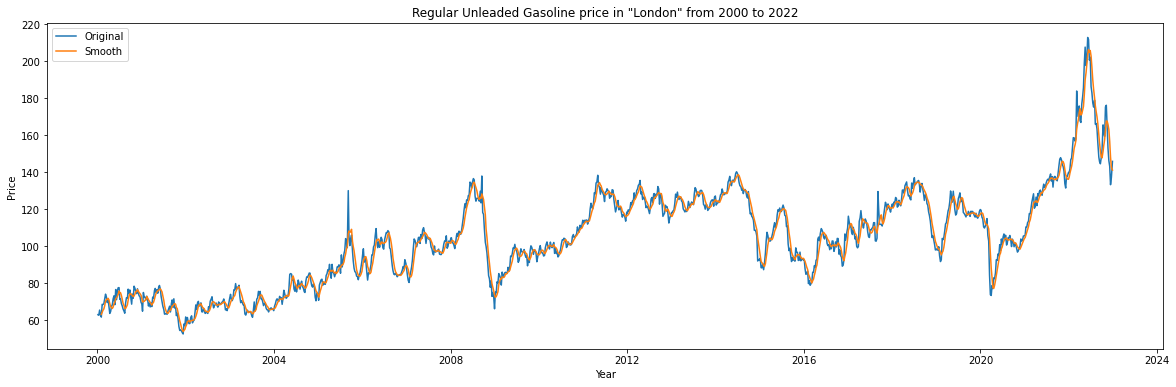

In [19]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the fuel type csv from the data folder 
df = pd.read_csv('data/fueltypesall1991-2023.csv')

# Data is filtered by only the Regular Unleaded Gasoline
regular_gasoline = df[df['Fuel Type'] == 'Regular Unleaded Gasoline']

# Data column will be set to a datetime type and have it set as the index
regular_gasoline['Date'] = pd.to_datetime(df['Date'])
regular_gasoline.set_index('Date', inplace=True)

# Data is filtered to only include data between 2000 & 2022
regular_gasoline = regular_gasoline.loc['2000':'2022']

# Calculating the simple moving average with windowsize = 5 
smooth_series = regular_gasoline.rolling(window=5).mean()

# Plot both the original & smoothed data for London between 2000 & 2022 
plt.figure(figsize=(20, 6))
plt.plot(regular_gasoline.index, regular_gasoline['London'], label='Original')
plt.plot(smooth_series.index, smooth_series['London'], label='Smooth')

#Set the X, Y Labels, Title & Legend for the Graph 
plt.xlabel('Year')
plt.ylabel('Price (cents per litre)')
plt.title('Regular Unleaded Gasoline price in "London" from 2000 to 2022')
plt.legend()
plt.show()


## Question 2

The following data set includes the volcanos in the world. 
https://github.com/plotly/datasets/blob/master/volcano_db.csv

Please plot a map with three countries: Canada, US and Mexico. Show the exact locations (latitude and longitude) of the volcanos on this map.


C:\Users\nisht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 114.0, 'Longitude Coordinates')

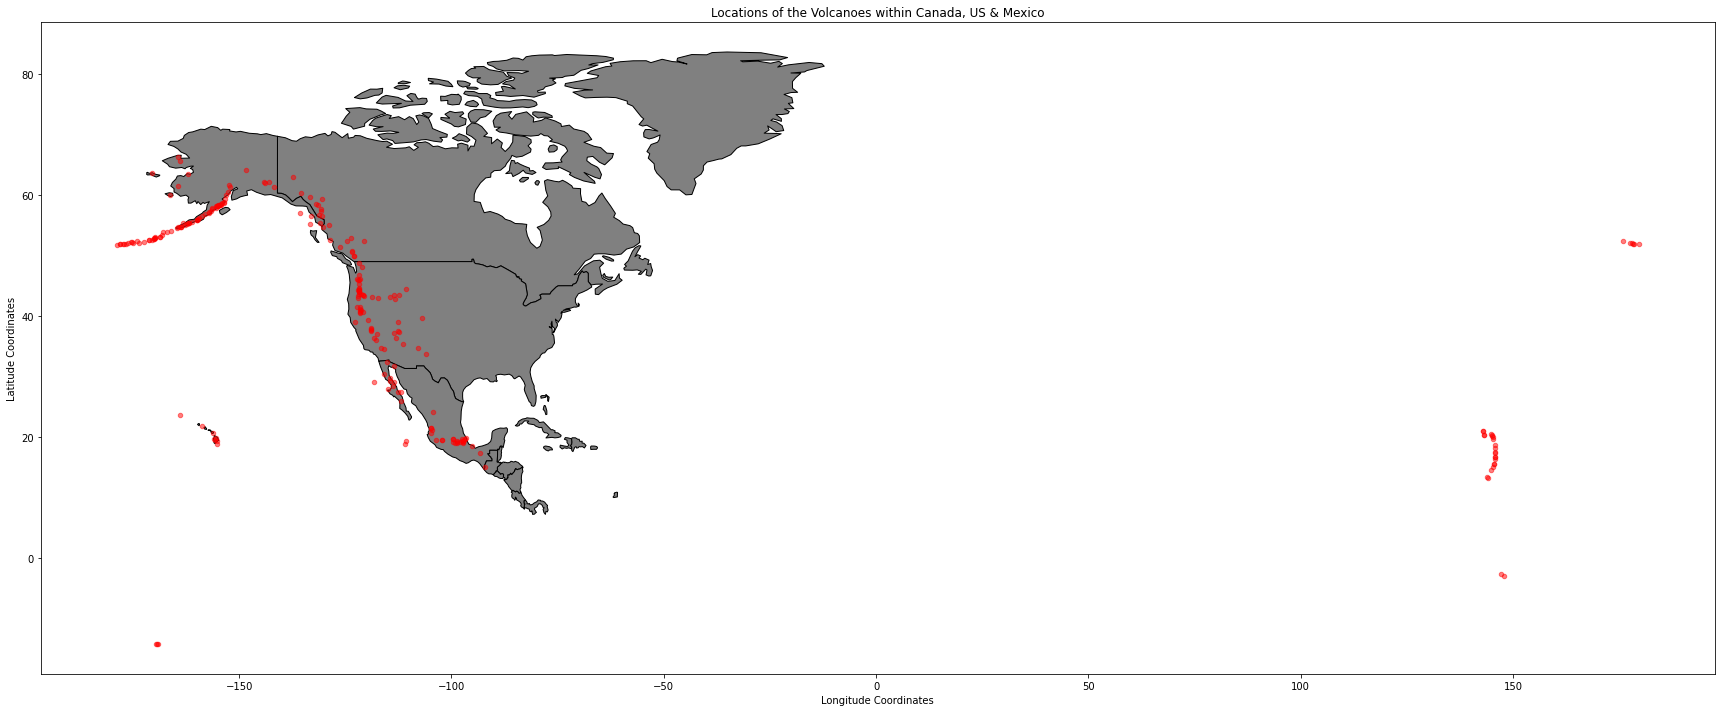

In [22]:
import pandas as pd
import geopandas as geo
volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))

# Data is filtered to show volcanoes in the specified countries 
volcano = volcano[volcano['Country'].isin(['Canada', 'United States', 'Mexico'])]

# Creating a map to show the North American Continent
map_NA = world[world.continent == 'North America']

#creating the figure/axis
fig, ax = plt.subplots(figsize = (30,15))

# PLot the map of North America 
map_NA.plot(ax= ax, color='grey', edgecolor='black')

# Plotting red scatter dots (volcano locations) on the North American Map  
volcano.plot(ax= ax, kind= 'scatter', x='Longitude', y='Latitude', color='red', alpha= 0.5)

# Set the title & X, Y Labels of the graph 
ax.set_title('Locations of the Volcanoes within Canada, US & Mexico')
ax.set_ylabel('Latitude Coordinates')
ax.set_xlabel('Longitude Coordinates')